In [822]:
import os 
import numpy as np 
from functools import wraps
import time
import multiprocessing


In [379]:
from collections import namedtuple
Item = namedtuple("Item", ['index', 'value', 'weight'])

In [380]:
data_files = os.listdir('Data')

In [707]:
def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__}{args} {kwargs} Took {total_time:.4f} seconds')
        return result
    return timeit_wrapper

In [381]:
data_files

['ks_60_0',
 'ks_4_0',
 'ks_45_0',
 'ks_30_0',
 'ks_lecture_dp_2',
 'ks_10000_0',
 'ks_300_0',
 'ks_200_0',
 'ks_100_1',
 'ks_100_0',
 'ks_200_1',
 'ks_500_0',
 'ks_400_0',
 'ks_lecture_dp_1',
 'ks_19_0',
 'ks_100_2',
 'ks_106_0',
 'ks_40_0',
 'ks_82_0',
 'ks_50_0',
 'ks_50_1',
 'ks_1000_0']

In [1059]:
input_file = open('Data/'+data_files[0])
input_data = input_file.read()

In [1060]:
items,capacity,item_count = parse_input(input_data)

In [1061]:
item_count,capacity

(60, 100000)

In [1062]:
def greedy(items,capacity):
    items = np.array(items)
    items_ranked_by_value_by_weight = items[np.argsort([-i[1]/i[2] for i in items])]
    i = 0
    free_space = capacity
    estimate = 0
    selected = []
    while free_space!=0 and i < len(items):
        item = items_ranked_by_value_by_weight[i]
        i+=1
        value = item[1]
        weight = item[2]
        index = item[0]
        if weight<free_space:
            estimate += value
            free_space -= weight
            selected.append(index)
        else: 
            continue
        
    return estimate,selected

In [1063]:
def dp(n,k,dp_array,items):
    if k<0:
        return -1e6
    else:
        index = n-1
        weight = items[index][2]
        value = items[index][1]
        if index==0:
            result = 0 if k<weight else value
            dp_array[index,k-1] = result
            return result
        else:
            result = max(dp(n-1,k,dp_array,items),dp(n-1,k-weight,dp_array,items)+value)
            dp_array[index,k-1] = result
            return  result


In [1064]:
def back_track(dp_array,remainder,result_back_tracking):
    weight_last = 0
    while remainder!=0:
        last = np.where(dp_array[:,-1-weight_last]==remainder)[0][0]
        value_last = items[last][1]
        weight_last += items[last][2]
        remainder = remainder - value_last
        result_back_tracking.append(last)

In [1065]:
def parse_input(input_data):
    
    # parse the input
    lines = input_data.split('\n')

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])

    items = []

    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1])))


    return items,capacity,item_count

In [1066]:
items,capacity,item_count = parse_input(input_data)

In [1079]:
@timeit
def solve_it(input_data,cutoff=10,capacity_override=None):
    start_time_global = time.time()
    items,capacity,item_count = parse_input(input_data)
    print(item_count)
    if capacity_override : capacity = capacity_override
    optimal = 1
    #if  < 
    
    # DP solution 
    # Try DP solution if takes less than 10min 
    dp_array = np.zeros((item_count,capacity))
    # Test run
    start_time = time.time()
    dp(item_count,30000,dp_array,items)
    run_time = (time.time() - start_time)
    print("--- %s seconds ---" % run_time)
    estimated_runtime = run_time * capacity/30000
    print("Estimated runtime {}".format(estimated_runtime))
    if estimated_runtime > cutoff:
        print('Would take too long to run dp solution. Resorting to greedy')
        greedy_solution,selected = greedy(items,capacity)
        optimal = 0
        solution = greedy_solution
    else:
    
        dp_array = np.zeros((item_count,capacity))
        dp_solution = dp(item_count,capacity,dp_array,items)

        result_back_tracking = []
        back_track(dp_array,dp_solution,result_back_tracking)
        solution = dp_solution
        selected = result_back_tracking

    to_return = np.zeros(item_count)
    to_return[selected] = 1
    to_return = to_return.astype(int)

    
    # prepare the solution in the specified output format
    output_data = str(solution) + ' ' + str(optimal) + '\n'
    output_data += ' '.join(map(str, to_return))
    
    #print('With input data :',input_data)
    #print('I return : ')
    
    return output_data,dp_array,time.time()-start_time_global

In [1080]:
output_data,dp_array,runtime = solve_it(input_data,1e10)
print(output_data)

60
--- 0.007522106170654297 seconds ---
Estimated runtime 0.025073687235514324
Function solve_it('60 100000\n90000 90001\n89750 89751\n10001 10002\n89500 89501\n10252 10254\n89250 89251\n10503 10506\n89000 89001\n10754 10758\n88750 88751\n11005 11010\n88500 88501\n11256 11262\n88250 88251\n11507 11514\n88000 88001\n11758 11766\n87750 87751\n12009 12018\n87500 87501\n12260 12270\n87250 87251\n12511 12522\n87000 87001\n12762 12774\n86750 86751\n13013 13026\n86500 86501\n13264 13278\n86250 86251\n13515 13530\n86000 86001\n13766 13782\n85750 85751\n14017 14034\n85500 85501\n14268 14286\n85250 85251\n14519 14538\n85000 85001\n14770 14790\n84750 84751\n15021 15042\n84500 84501\n15272 15294\n84250 84251\n15523 15546\n84000 84001\n15774 15798\n83750 83751\n16025 16050\n83500 83501\n16276 16302\n83250 83251\n16527 16554\n83000 83001\n16778 16806\n82750 82751\n17029 17058\n82500 82501\n', 10000000000.0) {} Took 5.1521 seconds
99837 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 

In [1071]:
runtimes = []
for capacity_override in [10000,15000,20000,25000,30000]:
    _,_,runtime = solve_it(input_data,1e10,capacity_override)
    runtimes.append(runtime)

60
--- 0.0001957416534423828 seconds ---
Estimated runtime 0.001957416534423828
Function solve_it('60 100000\n90000 90001\n89750 89751\n10001 10002\n89500 89501\n10252 10254\n89250 89251\n10503 10506\n89000 89001\n10754 10758\n88750 88751\n11005 11010\n88500 88501\n11256 11262\n88250 88251\n11507 11514\n88000 88001\n11758 11766\n87750 87751\n12009 12018\n87500 87501\n12260 12270\n87250 87251\n12511 12522\n87000 87001\n12762 12774\n86750 86751\n13013 13026\n86500 86501\n13264 13278\n86250 86251\n13515 13530\n86000 86001\n13766 13782\n85750 85751\n14017 14034\n85500 85501\n14268 14286\n85250 85251\n14519 14538\n85000 85001\n14770 14790\n84750 84751\n15021 15042\n84500 84501\n15272 15294\n84250 84251\n15523 15546\n84000 84001\n15774 15798\n83750 83751\n16025 16050\n83500 83501\n16276 16302\n83250 83251\n16527 16554\n83000 83001\n16778 16806\n82750 82751\n17029 17058\n82500 82501\n', 10000000000.0, 10000) {} Took 0.0042 seconds
60
--- 0.00010800361633300781 seconds ---
Estimated runtime 0.

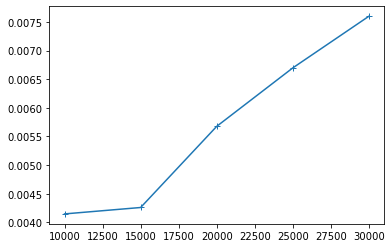

In [1073]:
import matplotlib.pyplot as plt 
plt.plot([x for x in [10000,15000,20000,25000,30000]],runtimes,marker='+')

In [945]:
import math

In [956]:
math.log(30000,2)

14.872674880270607

In [698]:
# Branch and bound technique

In [699]:
def get_optimistic_estimate(items,capacity,taken):
    n = len(items)
    mask = np.zeros(n)+1
    taken_extended = np.array(taken+(list(np.zeros(n-len(taken))+1)))
    mask = np.logical_and(mask,taken_extended)


    items_considered_for_estimate = np.array(items)[mask]

    items_ranked_by_value_by_weight = items_considered_for_estimate[np.argsort([-i[1]/i[2] for i in items_considered_for_estimate])]
    i = 0
    free_space = capacity
    estimate = 0
    while capacity!=0 and i < len(items_considered_for_estimate):
        item = items_ranked_by_value_by_weight[i]
        value = item[1]
        weight = item[2]
        if weight<free_space:
            estimate += value
            free_space -= weight
        else: 
            fraction = free_space/weight
            estimate += value * fraction 
            free_space = 0
        i+=1
    return estimate

In [700]:
#items = [(0,45,5),(1,48,8),(2,35,3)]
#capacity = 10 
#taken = [1,0,0]
#depth = 1
#get_optimistic_estimate(items,capacity,taken)

In [835]:
def branch_and_bound(items,taken,room,value,depth,best_value,best_path):
    #print(items)
    estimate = get_optimistic_estimate(items,capacity,taken)

    if estimate < best_value[0]:
        return 

    if depth == len(items):
        #print('Depth is {}'.format(depth))
        #print('Path is {}'.format(taken))
        #print('Roon is {}'.format(room))
        if value > best_value[0]:
            best_value[0] = value
            best_path.append(taken)
            #print("new best_value found {}".format(best_value[0]))

    else :
        value_item = items[depth][1]
        weight = items[depth][2]
        #print('Assessing item with weight {} and value {}'.format(weight,value_item))
        if weight>room:
            branch_and_bound(items,taken+[0],room,value,depth+1,best_value,best_path)
        else:
            branch_and_bound(items,taken+[1],room-weight,value+value_item,depth+1,best_value,best_path)
            branch_and_bound(items,taken+[0],room,value,depth+1,best_value,best_path)


In [836]:
value = 0
room = capacity 
taken = []
depth = 0
best_value = [0]
best_path = []
branch_and_bound(items,taken,room,value,depth,best_value,best_path)

KeyboardInterrupt: 

In [ ]:
best_path[-1]

In [687]:
best_value

[44]

In [603]:
items

[(0, 45, 5), (1, 48, 8), (2, 35, 3)]

In [453]:
a[~1]

4

In [630]:
capacity

10

In [462]:
a = np.ma.array(a, mask=False)
a.mask[[3,4]] = True

In [463]:
a

masked_array(data=[1, 2, 3, --, --],
             mask=[False, False, False,  True,  True],
       fill_value=999999)

In [464]:
a.data[~a.mask]

array([1, 2, 3])